In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
telco_data = pd.read_csv('Telco-Customer-Churn.csv')
#telco_data = pd.read_csv('Telco-Customer-Churn.csv', na_values=['', ' '])
#telco_data = telco_data.replace(['', ' '], [np.nan, np.nan])

In [4]:
telco_data.shape

(5634, 21)

In [5]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


In [6]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


### Ci sono molte più osservazioni con churn=No rispetto a Yes

Text(0.5, 1.0, 'churned')

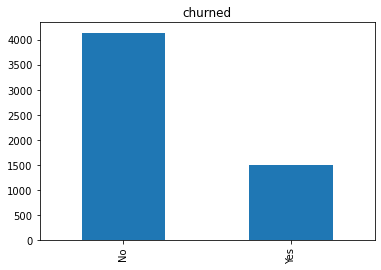

In [7]:
telco_data['Churn'].value_counts().plot(kind='bar').set_title('churned')

### Alcuni valori categorici delle colonne che non hanno solo Yes/No.

Le colonne OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies hanno tutte valori Yes/No/No internet service

In [8]:
pd.unique(telco_data.MultipleLines)

array(['No', 'Yes', 'No phone service'], dtype=object)

In [9]:
pd.unique(telco_data.InternetService)

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [10]:
pd.unique(telco_data.Contract)

array(['One year', 'Two year', 'Month-to-month'], dtype=object)

In [11]:
pd.unique(telco_data.PaymentMethod)

array(['Mailed check', 'Bank transfer (automatic)', 'Electronic check',
       'Credit card (automatic)'], dtype=object)

### Conviene provare ad accorpare i "No" e "No Internet service". Anche "No" e "No phone service"

In [12]:
telco_data['MultipleLines'] = telco_data['MultipleLines'].replace('No phone service', 'No')

column_list = telco_data.loc[:, 'OnlineSecurity':'StreamingMovies'].columns.tolist()

for col in column_list:
    telco_data[col] = telco_data[col].replace('No internet service', 'No')
    
telco_data

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Yes,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5630,No,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5631,No,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,21.15,306.05
5632,Yes,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


La colonna TotalCharges ha dei valori vuoti (solo 10, conviene cancellare le righe rispetto a tutta la colonna)

In [13]:
telco_data.TotalCharges.head()

0     1336.8
1    5129.45
2      23.45
3     237.95
4           
Name: TotalCharges, dtype: object

In [14]:
(telco_data.TotalCharges.values == ' ').sum()

10

Rimpiazzo ' ' con NaN e elimino le righe corrispondenti, convertendo poi la colonna TotalCharges in float

In [15]:
telco_data['TotalCharges'].replace(' ', np.nan, inplace=True)
telco_data.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN


In [16]:
telco_data = telco_data.dropna()

In [17]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5624 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5624 non-null   object 
 1   customerID        5624 non-null   object 
 2   gender            5624 non-null   object 
 3   SeniorCitizen     5624 non-null   int64  
 4   Partner           5624 non-null   object 
 5   Dependents        5624 non-null   object 
 6   tenure            5624 non-null   int64  
 7   PhoneService      5624 non-null   object 
 8   MultipleLines     5624 non-null   object 
 9   InternetService   5624 non-null   object 
 10  OnlineSecurity    5624 non-null   object 
 11  OnlineBackup      5624 non-null   object 
 12  DeviceProtection  5624 non-null   object 
 13  TechSupport       5624 non-null   object 
 14  StreamingTV       5624 non-null   object 
 15  StreamingMovies   5624 non-null   object 
 16  Contract          5624 non-null   object 


In [18]:
telco_data['TotalCharges'] = telco_data['TotalCharges'].astype(float)

c:\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5624.000000,5624.000000,5624.000000,5624.000000
mean,0.161095,32.430654,64.911620,2291.154605
std,0.367652,24.408029,30.081601,2263.151534
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.800000,411.512500
50%,0.000000,29.000000,70.550000,1410.800000
75%,0.000000,55.000000,89.950000,3808.850000
max,1.000000,72.000000,118.600000,8684.800000


I customerID hanno tutti valori diversi, che sembrano assegnati in modo randomico e quindi privi di informazioni utilizzabili per la classificazione.

Anche separando la stringa tipo, che ha formato "XXXX-YYYYY" con X digit intero e Y carattere maiuscolo, ci sono molti più valori che ognuna delle due sottostringhe possono assumere rispetto alle righe del dataset.

In [20]:
telco_data['customerID'].nunique()

5624

In [21]:
telco_data = telco_data.drop(columns='customerID')

In [22]:
telco_data['MonthlyCharges'].nunique()

1494

In [23]:
telco_data['TotalCharges'].nunique()

5299

I valori di Tenure sono spesso simili tra loro e potrebbero essere utili da analizzare

In [24]:
telco_data['tenure'].nunique()

72

## Exploratory Data Analysis

Esploriamo i dati per cercare quali colonne siano più significative ai fini della classificazione.

Preparo la colonna Churn sostituendo Yes/No con 1/0

In [25]:
telco_data['Churn'] = telco_data['Churn'].replace(['Yes', 'No'], [1, 0])

### Gender

Non c'è molta differenza tra Male e Female sul numero di churn avvenuti (drop)

,Churn
gender,
Male,2881
Female,2743


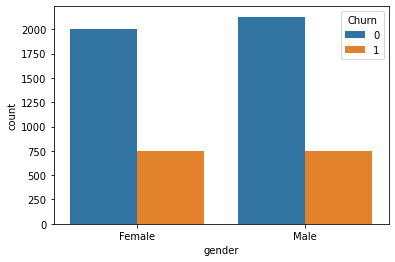

In [26]:
# Analyze the count of client Churn by gender
ax = sns.countplot(x="gender", hue="Churn", data=telco_data)
telco_data[['gender', 'Churn']].groupby(['gender']).count().sort_values(by='Churn', ascending=False)

,Churn
gender,
Female,0.271236
Male,0.261020


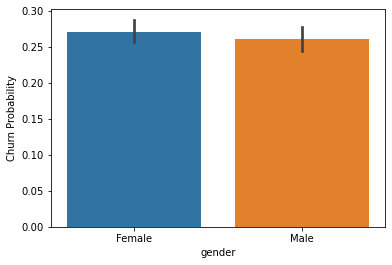

In [27]:
# Analyze the Survival Probability by Pclass
g = sns.barplot(x="gender",y="Churn",data=telco_data)
g = g.set_ylabel("Churn Probability")
telco_data[['gender', 'Churn']].groupby(['gender']).mean().sort_values(by='Churn', ascending=False)

In [28]:
telco_data = telco_data.drop(columns='gender')

### SeniorCitizen

La probabilità di churn per loro è più alta (quasi il doppio). Tuttavia i clienti anziani sono molti di meno nel dataset.

,Churn
SeniorCitizen,
0,4718
1,906


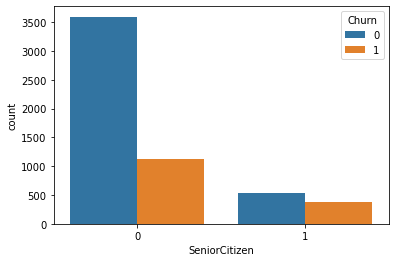

In [29]:
# Analyze the count of client Churn by gender
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=telco_data)
telco_data[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen']).count().sort_values(by='Churn', ascending=False)

,Churn
SeniorCitizen,
1,0.413907
0,0.237601


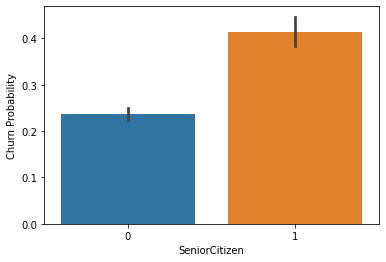

In [30]:
# Analyze the Churn Probability by SeniorCitizen
g = sns.barplot(x="SeniorCitizen",y="Churn",data=telco_data)
g = g.set_ylabel("Churn Probability")
telco_data[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen']).mean().sort_values(by='Churn', ascending=False)

### Partner

I clienti che non hanno un Partner hanno più probabilità di churn

### Dependents

I clienti che non hanno Dependents hanno più probabilità di churn

Ci sono molti valori simili nelle due colonne (circa 4000 su 5000). Si potrebbe in qualche modo unire le due colonne (facendo un AND oppure un OR)

            Churn
Partner          
No       0.326671
Yes      0.201323
               Churn
Dependents          
Yes         0.156605
No          0.312326


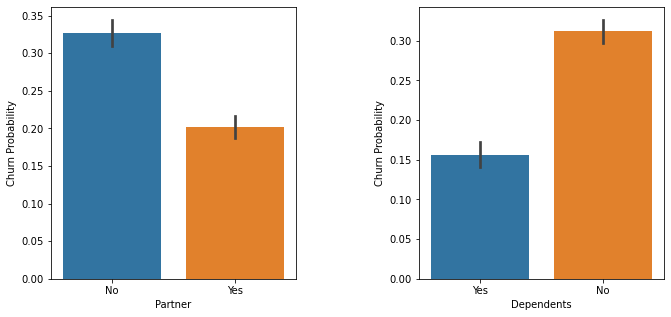

In [31]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
plt.subplots_adjust(wspace=0.5)

# Analyze the Churn Probability by Partner
g = sns.barplot(x="Partner",y="Churn",data=telco_data, ax=ax[0])
g = g.set_ylabel("Churn Probability")
print(telco_data[['Partner', 'Churn']].groupby(['Partner']).mean().sort_values(by='Churn', ascending=False))

# Analyze the Churn Probability by Dependents
g = sns.barplot(x="Dependents",y="Churn",data=telco_data, ax=ax[1])
g = g.set_ylabel("Churn Probability")
print(telco_data[['Dependents', 'Churn']].groupby(['Dependents']).mean().sort_values(by='Churn', ascending=True))

Ci sono molti valori simili tra le due colonne

In [32]:
print(telco_data.shape)
(telco_data['Partner']==telco_data['Dependents']).sum()

(5624, 19)


4005

### Tenure

Il tenore di vita del cliente è un fattore determinante per il churn. Un tenore più basso, nei casi di churn, determina una maggiore probabilità del cliente di abbandonare l'operatore. Possibile sia utile dividere in diverse fasce (ad es. 5) con pd.qcut (Attenzione: la performance peggiora).

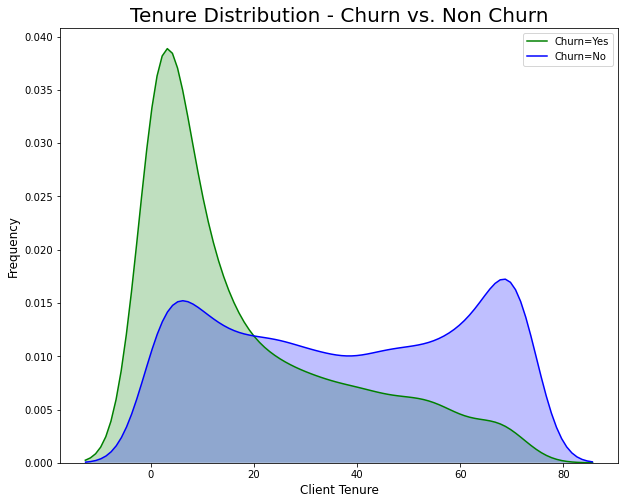

In [33]:
# Let's explore the distribution of tenure by response variable (Churn)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(telco_data.loc[(telco_data['Churn'] == 1),'tenure'] , color='g',shade=True, label='Churn=Yes')
axis = sns.kdeplot(telco_data.loc[(telco_data['Churn'] == 0),'tenure'] , color='b',shade=True,label='Churn=No')
plt.title('Tenure Distribution - Churn vs. Non Churn', fontsize = 20)
plt.xlabel("Client Tenure", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);


 mu = 32.43 and sigma = 24.41



Text(0.5, 1.0, 'Tenure distribution')

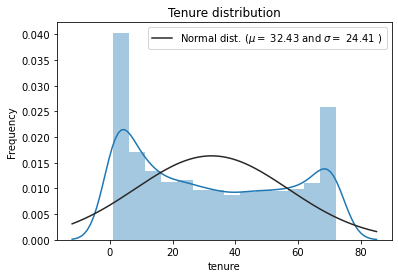

In [34]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(telco_data['tenure'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(telco_data['tenure'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Tenure distribution')

In [35]:
# Worse performance
#telco_data['tenure'] = pd.qcut(telco_data['tenure'], 5, labels=False)
#telco_data

### Contract

Feature di grande rilevanza. I contratti più corti, in particolare mensili, hanno molta più probabilità di churn. Potrebbe essere conveniente aggregare le classi relative ai contratti da 1 e 2 anni.

,Churn
Contract,
Month-to-month,3083
Two year,1330
One year,1211


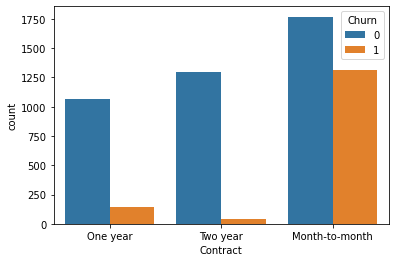

In [36]:
# Analyze the count of client Churn by Contract
ax = sns.countplot(x="Contract", hue="Churn", data=telco_data)
telco_data[['Contract', 'Churn']].groupby(['Contract']).count().sort_values(by='Churn', ascending=False)

,Churn
Contract,
Two year,0.028571
One year,0.118084
Month-to-month,0.426533


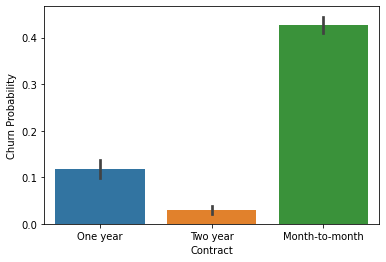

In [37]:
# Analyze the Churn Probability by Contract
g = sns.barplot(x="Contract",y="Churn",data=telco_data)
g = g.set_ylabel("Churn Probability")
telco_data[['Contract', 'Churn']].groupby(['Contract']).mean().sort_values(by='Churn', ascending=True)

### MonthlyCharges

I clienti con costi mensili più alti cambiano operatore più facilmente, e viceversa

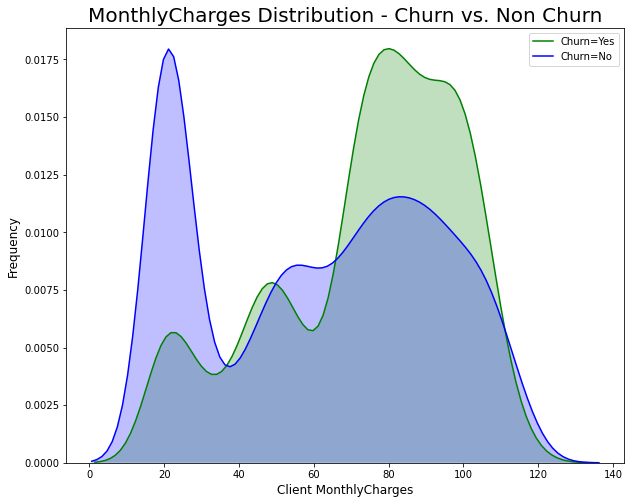

In [38]:
# Let's explore the distribution of MonthlyCharges by response variable (Churn)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(telco_data.loc[(telco_data['Churn'] == 1),'MonthlyCharges'] , color='g',shade=True, label='Churn=Yes')
axis = sns.kdeplot(telco_data.loc[(telco_data['Churn'] == 0),'MonthlyCharges'] , color='b',shade=True,label='Churn=No')
plt.title('MonthlyCharges Distribution - Churn vs. Non Churn', fontsize = 20)
plt.xlabel("Client MonthlyCharges", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);


 mu = 64.91 and sigma = 30.08



Text(0.5, 1.0, 'MonthlyCharges distribution')

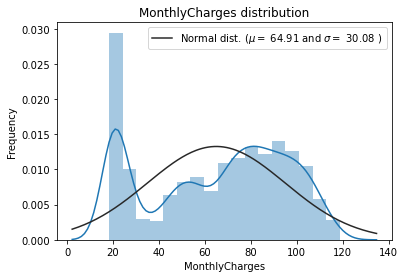

In [39]:
sns.distplot(telco_data['MonthlyCharges'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(telco_data['MonthlyCharges'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('MonthlyCharges distribution')

### TotalCharges

I clienti che hanno speso un saldo totale minore più facilmente cambiano operatore (fidelizzazione?)

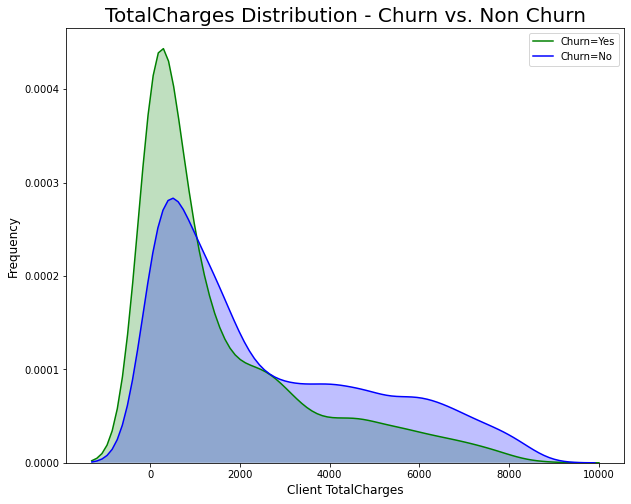

In [40]:
# Let's explore the distribution of TotalCharges by response variable (Churn)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(telco_data.loc[(telco_data['Churn'] == 1),'TotalCharges'] , color='g',shade=True, label='Churn=Yes')
axis = sns.kdeplot(telco_data.loc[(telco_data['Churn'] == 0),'TotalCharges'] , color='b',shade=True,label='Churn=No')
plt.title('TotalCharges Distribution - Churn vs. Non Churn', fontsize = 20)
plt.xlabel("Client TotalCharges", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);


 mu = 2291.15 and sigma = 2262.95



Text(0.5, 1.0, 'TotalCharges distribution')

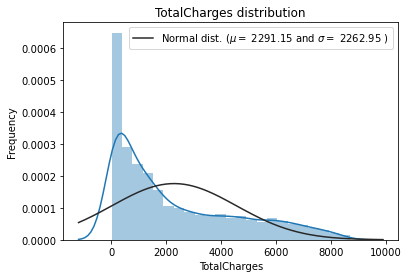

In [41]:
sns.distplot(telco_data['TotalCharges'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(telco_data['TotalCharges'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('TotalCharges distribution')

### PhoneService, MultipleLines

Avere una linea telefonica (o più) porta ad un costo maggiore e ad un incremento della probabilità di churn (seppur lieve in questo caso)

                 Churn
PhoneService          
Yes           0.267245
No            0.254545
                  Churn
MultipleLines          
No             0.252322
Yes            0.284461


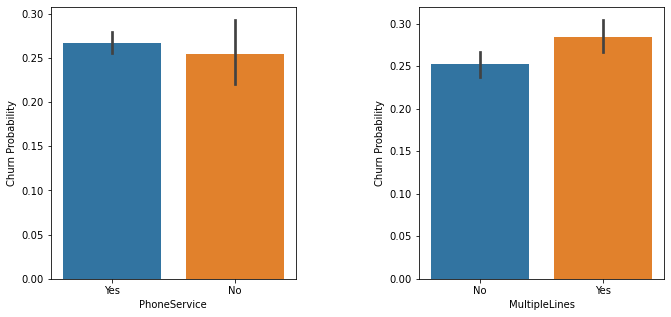

In [42]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
plt.subplots_adjust(wspace=0.5)

# Analyze the Churn Probability by Partner
g = sns.barplot(x="PhoneService",y="Churn",data=telco_data, ax=ax[0])
g = g.set_ylabel("Churn Probability")
print(telco_data[['PhoneService', 'Churn']].groupby(['PhoneService']).mean().sort_values(by='Churn', ascending=False))

# Analyze the Churn Probability by Dependents
g = sns.barplot(x="MultipleLines",y="Churn",data=telco_data, ax=ax[1])
g = g.set_ylabel("Churn Probability")
print(telco_data[['MultipleLines', 'Churn']].groupby(['MultipleLines']).mean().sort_values(by='Churn', ascending=True))

### InternetService

Gli utenti che hanno una linea in fibra (o DSL) hanno una probabilità maggiore di churn (poiché hanno costi maggiori si suppone)

                 Churn
InternetService       
Fiber optic       2481
DSL               1935
No                1208
                    Churn
InternetService          
No               0.076987
DSL              0.192248
Fiber optic      0.415558


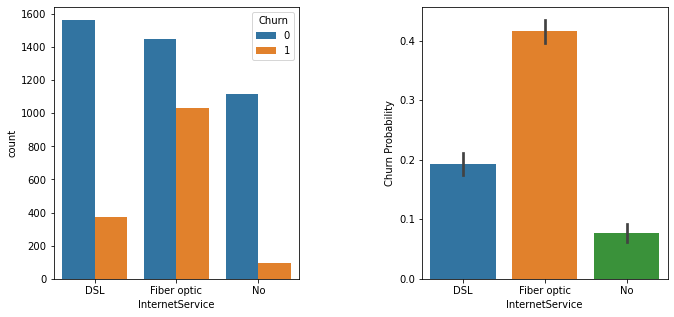

In [43]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
plt.subplots_adjust(wspace=0.5)

# Analyze the Churn Probability by Partner
g = sns.countplot(x="InternetService",hue="Churn",data=telco_data, ax=ax[0])
print(telco_data[['InternetService', 'Churn']].groupby(['InternetService']).count().sort_values(by='Churn', ascending=False))

# Analyze the Churn Probability by Dependents
g = sns.barplot(x="InternetService",y="Churn",data=telco_data, ax=ax[1])
g = g.set_ylabel("Churn Probability")
print(telco_data[['InternetService', 'Churn']].groupby(['InternetService']).mean().sort_values(by='Churn', ascending=True))

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

Generalmente le feature hanno una qualche rilevanza al fine di determinare la probabilità di churn (alcune più, alcune meno)

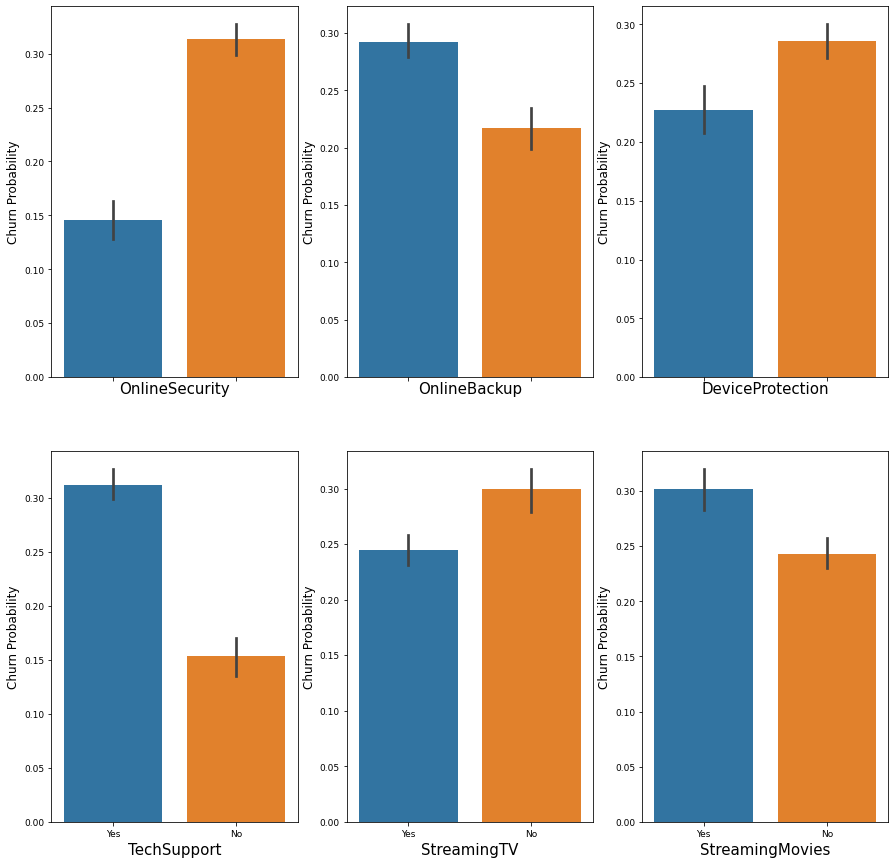

In [44]:
#Feature probability to churn
nrows = 2
ncols = 3

column_names = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

ncolumn = 0
for row in range(nrows):
    for col in range(ncols):
        name = column_names[ncolumn]
        g = sns.barplot(x=name, y="Churn", data=telco_data, ax=axes[row][col])
        telco_data[[name, 'Churn']].groupby([name]).mean().sort_values(by='Churn', ascending=False)
        g.set_xlabel(name, fontsize=15)
        g.set_ylabel("Churn Probability", fontsize=12)
        g.tick_params(labelsize=9)
        ncolumn += 1

### PaperlessBilling

L'utilizzo di fatture elettroniche aumenta la probabilità di churn

                  Churn
PaperlessBilling       
Yes                3322
No                 2302
                     Churn
PaperlessBilling          
No                0.164639
Yes               0.336243


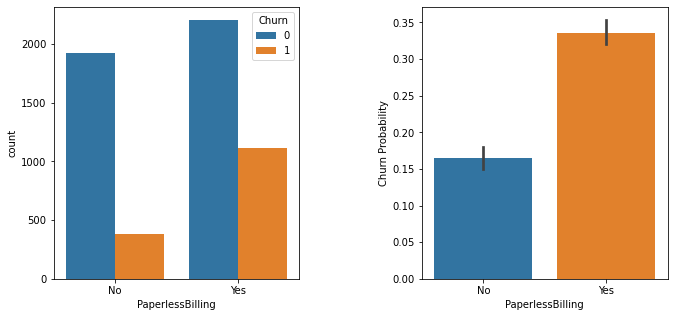

In [45]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
plt.subplots_adjust(wspace=0.5)

# Analyze the Churn Probability by Partner
g = sns.countplot(x="PaperlessBilling",hue="Churn",data=telco_data, ax=ax[0])
print(telco_data[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling']).count().sort_values(by='Churn', ascending=False))

# Analyze the Churn Probability by Dependents
g = sns.barplot(x="PaperlessBilling",y="Churn",data=telco_data, ax=ax[1])
g = g.set_ylabel("Churn Probability")
print(telco_data[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling']).mean().sort_values(by='Churn', ascending=True))

### PaymentMethod

Il pagamento elettronico corrisponde ad una maggiore probabilità di churn. Potrebbe essere conveniente aggregare le altre 3 classi insieme per avere una feature binaria.

                           Churn
PaymentMethod                   
Electronic check            1887
Mailed check                1275
Bank transfer (automatic)   1236
Credit card (automatic)     1226
                              Churn
PaymentMethod                      
Credit card (automatic)    0.152529
Bank transfer (automatic)  0.174757
Mailed check               0.191373
Electronic check           0.449921


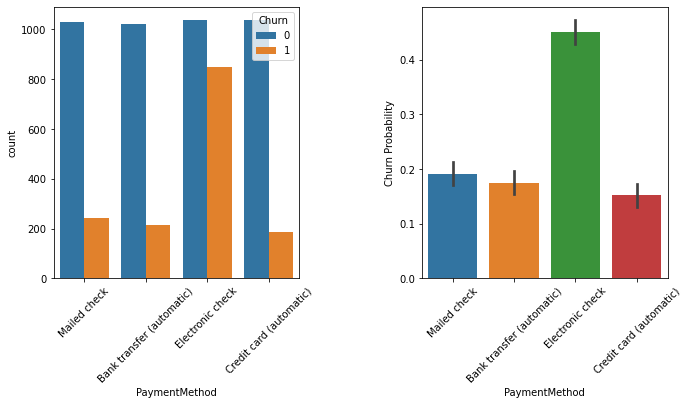

In [46]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
plt.subplots_adjust(wspace=0.5)

# Analyze the Churn Probability by Partner
g = sns.countplot(x="PaymentMethod",hue="Churn",data=telco_data, ax=ax[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
print(telco_data[['PaymentMethod', 'Churn']].groupby(['PaymentMethod']).count().sort_values(by='Churn', ascending=False))

# Analyze the Churn Probability by Dependents
g = sns.barplot(x="PaymentMethod",y="Churn",data=telco_data, ax=ax[1])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g = g.set_ylabel("Churn Probability")
print(telco_data[['PaymentMethod', 'Churn']].groupby(['PaymentMethod']).mean().sort_values(by='Churn', ascending=True))

## Uso del LabelEncoder di sklearn

In [47]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5624 entries, 0 to 5633
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5624 non-null   int64  
 1   SeniorCitizen     5624 non-null   int64  
 2   Partner           5624 non-null   object 
 3   Dependents        5624 non-null   object 
 4   tenure            5624 non-null   int64  
 5   PhoneService      5624 non-null   object 
 6   MultipleLines     5624 non-null   object 
 7   InternetService   5624 non-null   object 
 8   OnlineSecurity    5624 non-null   object 
 9   OnlineBackup      5624 non-null   object 
 10  DeviceProtection  5624 non-null   object 
 11  TechSupport       5624 non-null   object 
 12  StreamingTV       5624 non-null   object 
 13  StreamingMovies   5624 non-null   object 
 14  Contract          5624 non-null   object 
 15  PaperlessBilling  5624 non-null   object 
 16  PaymentMethod     5624 non-null   object 


In [48]:
# Categorical boolean mask
categorical_feature_mask = telco_data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = telco_data.columns[categorical_feature_mask].tolist()

In [49]:
print(categorical_cols)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
# apply le on categorical feature columns
telco_data[categorical_cols] = telco_data[categorical_cols].apply(lambda col: le.fit_transform(col))
telco_data[categorical_cols].head(10)

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,1,0,0,1,0,1,0,0,1,1,0,3
1,0,0,1,1,1,0,1,0,0,1,1,2,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,2
3,0,0,1,0,1,0,0,0,0,0,0,0,1,2
5,0,0,1,0,1,0,0,0,0,0,0,0,1,2
6,1,1,1,0,2,0,0,0,0,0,0,2,0,3
7,1,1,1,0,2,0,0,0,0,0,0,2,1,1
8,0,0,0,0,0,0,0,1,0,1,0,0,1,2
9,0,1,1,0,2,0,0,0,0,0,0,1,1,0
10,1,0,1,0,1,0,0,0,0,0,0,0,1,2


Churn aveva valori Yes/No ed ora ha valori 1/0

gender ha M/F mappati su 1/0

Al massimo abbiamo 4 classi sulla feature categorica PaymentMethod

In [52]:
telco_data.shape
telco_data.nunique()

Churn                  2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1494
TotalCharges        5299
dtype: int64

## OneHotEncoder sulle rimanenti colonne con 3+ classi

La accuracy rimane invariata.

In [53]:
#from sklearn.preprocessing import OneHotEncoder

#enc = OneHotEncoder(sparse=False)
#telco_data = enc.fit_transform(telco_data).toarray()
#telco_data

column_list = ['InternetService', 'Contract', 'PaymentMethod']    
telco_data = pd.get_dummies(data=telco_data, columns=column_list)

In [54]:
telco_data.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_0', 'InternetService_1', 'InternetService_2',
       'Contract_0', 'Contract_1', 'Contract_2', 'PaymentMethod_0',
       'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3'],
      dtype='object')

## Separazione del dataset in training e test

In [55]:
from sklearn.model_selection import train_test_split

X = telco_data.drop(['Churn'], axis=1)
y = telco_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7, test_size=0.3)

### Prova modello RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Text(0.5, 1.0, 'RandomForestClassifier feature importance')

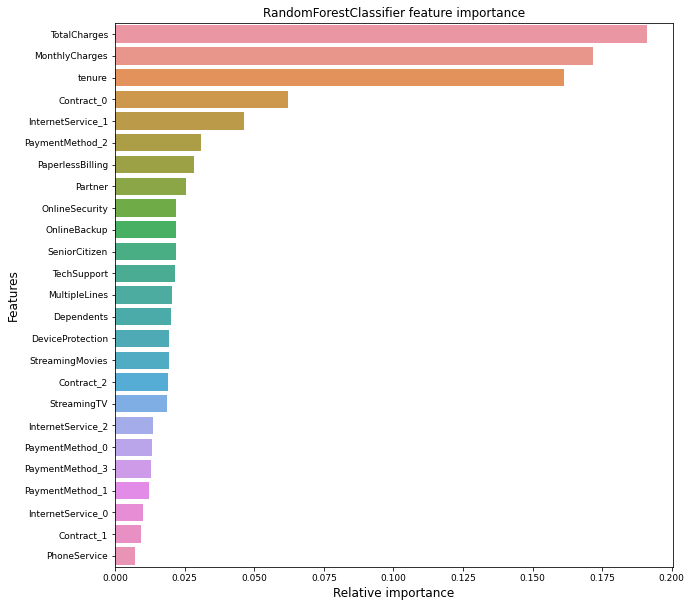

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, sharex="all", figsize=(10,10))

indices = np.argsort(model.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],x = model.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title('RandomForestClassifier' + " feature importance")

In [58]:
print('Training Accuracy: ', model.score(X_train, y_train) * 100, '%')
print('Testing Accuracy: ', model.score(X_test, y_test) * 100, '%')

Training Accuracy:  99.8221544715447 %
Testing Accuracy:  78.49526066350711 %


### Prova modello LogisticRegression

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

print('Training Accuracy: ', model.score(X_train, y_train) * 100, '%')
print('Testing Accuracy: ', model.score(X_test, y_test) * 100, '%')

Training Accuracy:  80.53861788617887 %
Testing Accuracy:  78.37677725118483 %


## Modello utilizzato per training (DecisionTreeClassifier)

In [60]:
from sklearn.tree import DecisionTreeClassifier

max_loop_depth = 40
max_score = 0
best_depth = 0

for depth in range(1, max_loop_depth):
    model = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if(score > max_score):
        max_score = score
        best_depth = depth
    
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [61]:
best_model.feature_importances_

array([0.        , 0.        , 0.        , 0.20572772, 0.01673461,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00789703, 0.        , 0.0215381 , 0.02558707,
       0.        , 0.17748307, 0.03117049, 0.5064103 , 0.        ,
       0.0074516 , 0.        , 0.        , 0.        , 0.        ])

Text(0.5, 1.0, 'DecisionTreeClassifier feature importance')

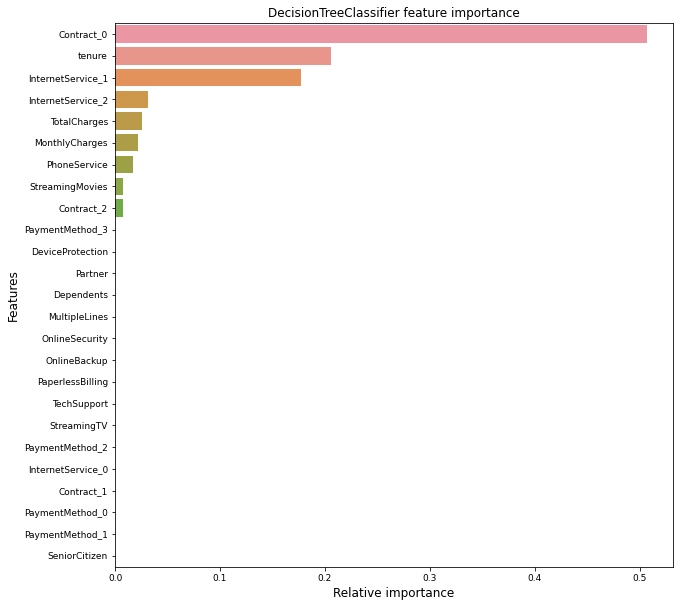

In [62]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, sharex="all", figsize=(10,10))

indices = np.argsort(best_model.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],x = best_model.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title('DecisionTreeClassifier' + " feature importance")

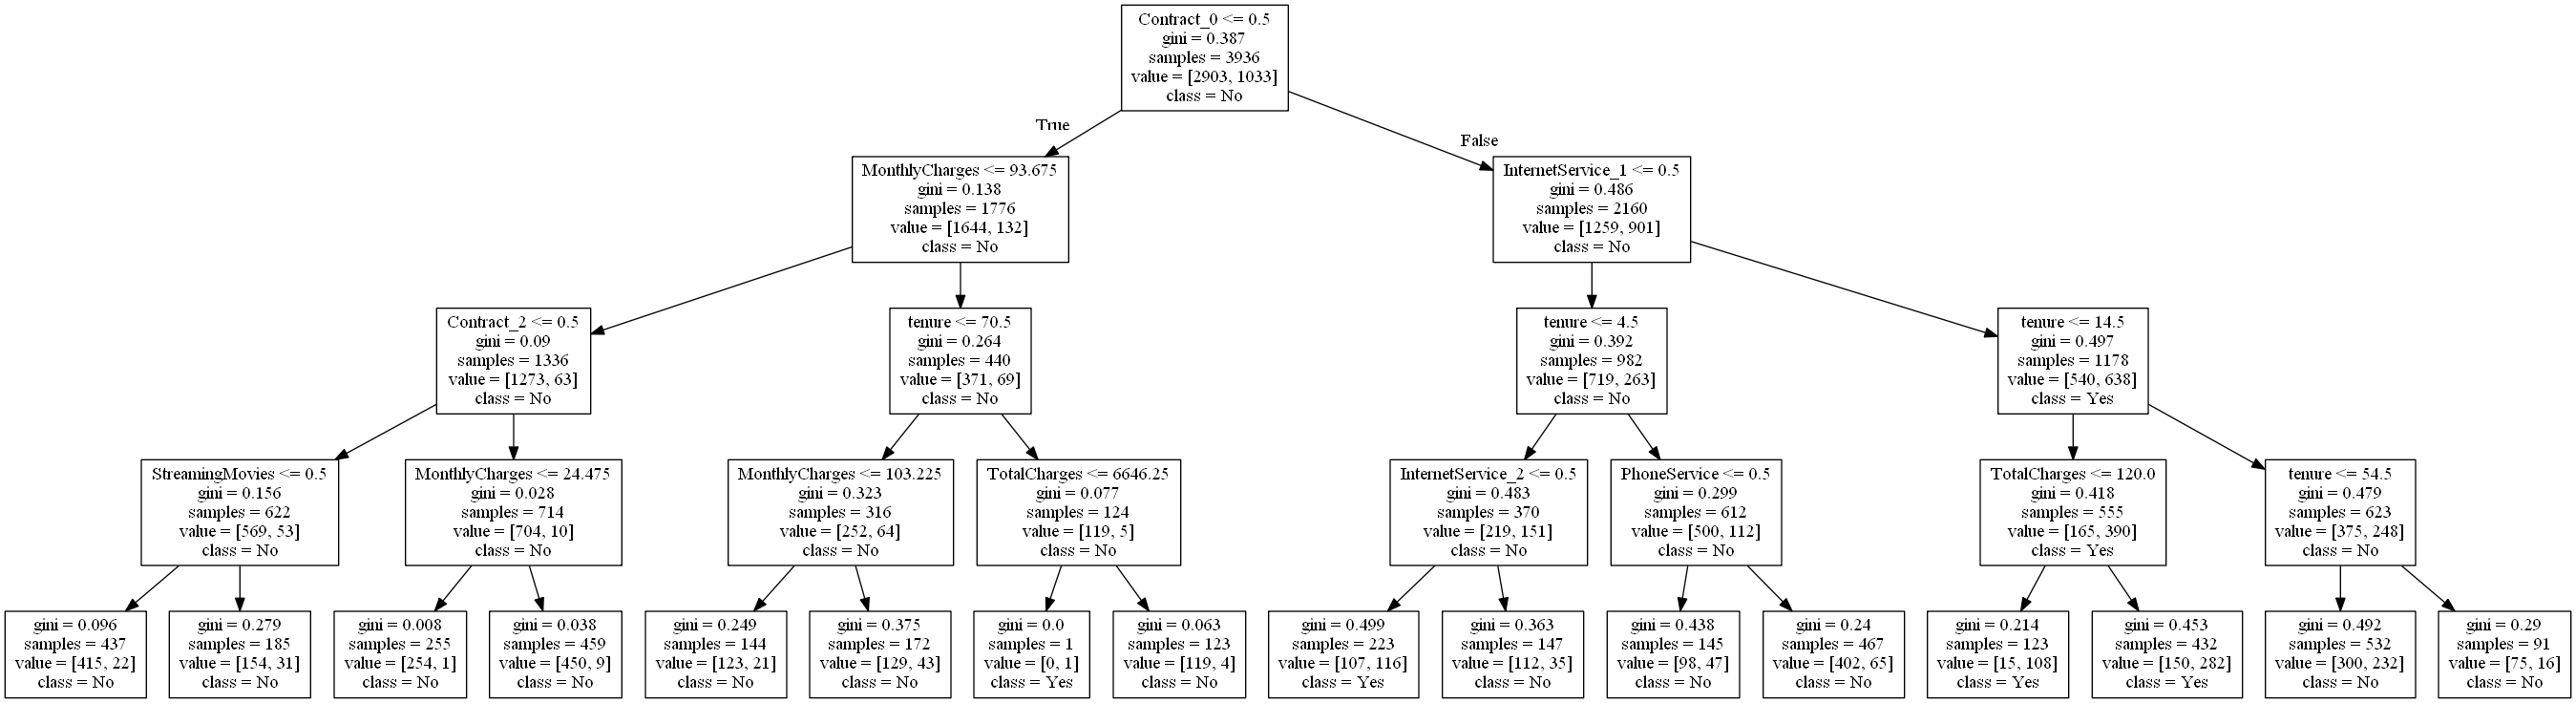

In [63]:
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(best_model, out_file=None, 
                                feature_names=telco_data.drop(columns='Churn').columns,  
                                class_names=telco_data['Churn'].replace([0, 1], ['No', 'Yes']).unique().astype('str'))

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('decision_tree.png')

# Show graph
Image(graph.create_png())

In [64]:
print('Training Accuracy: ', best_model.score(X_train, y_train) * 100, '%')
print('Testing Accuracy: ', best_model.score(X_test, y_test) * 100, '%')

Training Accuracy:  79.72560975609755 %
Testing Accuracy:  77.8436018957346 %
